In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

In [4]:
df.head()

,crop_id,crop_name,crop_growth_stage,crop_type,crop_temp,crop_humidity,crop_ph,crop_nitrogen,crop_phosphorus,crop_potassium,...,crop_boron,crop_iron,crop_zinc,crop_manganese,crop_molybdenum,crop_nickel,crop_cobalt,crop_sodium,crop_ec,crop_light
0,0,aloevera,flowering,multipurpose,17.053,219.327,3.5,30.213,13.128,5.222,...,0.200,0.111,0.113,0.111,0.111,0.111,0.114,0.365,0.785,384.226
1,1,aloevera,harvesting,multipurpose,17.565,226.295,3.5,30.326,13.198,5.288,...,0.204,0.111,0.141,0.138,0.154,0.160,0.128,0.375,0.794,396.051
2,2,aloevera,seeding,multipurpose,17.688,231.111,3.5,30.344,13.266,5.318,...,0.222,0.124,0.149,0.139,0.178,0.175,0.154,0.378,0.843,404.879
3,3,aloevera,vegetative,multipurpose,17.710,238.016,3.5,30.353,13.305,5.466,...,0.233,0.152,0.173,0.159,0.180,0.185,0.164,0.387,0.912,433.416
4,4,armeniancucumbers,flowering,fruitables,17.724,239.391,3.5,31.431,13.406,5.589,...,0.238,0.172,0.177,0.167,0.201,0.186,0.178,0.395,1.010,436.263


In [5]:
df.size

19100

In [6]:
df.shape

(764, 25)

In [7]:
df.columns

Index(['crop_id', 'crop_name', 'crop_growth_stage', 'crop_type', 'crop_temp',
       'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus',
       'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_sulfur',
       'crop_copper', 'crop_chlorine', 'crop_boron', 'crop_iron', 'crop_zinc',
       'crop_manganese', 'crop_molybdenum', 'crop_nickel', 'crop_cobalt',
       'crop_sodium', 'crop_ec', 'crop_light'],
      dtype='object')

In [8]:
df['crop_name'].unique()

array(['aloevera', 'armeniancucumbers', 'arugula', 'ashwagandha',
       'babyeggplant', 'babyspinach', 'baylaurel', 'bayleaf',
       'beechmushrooms', 'beefsteaktomatoes', 'beetgreens', 'beetroot',
       'bergamot', 'bibbbutterheadlettuce', 'blackberries', 'blackpepper',
       'blueberries', 'bokchoy', 'borage', 'bostonbutterheadlettuce',
       'brusselssprouts', 'cabbage', 'calabresebroccoli', 'calendula',
       'canarymelons', 'cantaloupe', 'capsicum', 'cardamom', 'carrot',
       'catnip', 'cauliflower', 'cayenne', 'celery', 'chamomile',
       'chestnutmushrooms', 'chinesebroccoli', 'chioggiabeets', 'chives',
       'chocolatemint', 'cilantro', 'cinnamon', 'clove', 'colocasiaroot',
       'coralmushrooms', 'coriander', 'corianderleaf', 'creminimushrooms',
       'cucamelon', 'cucumisutilissimus', 'curlykale', 'curlyparsley',
       'daikonradishes', 'daylilies', 'dianthus', 'dill', 'echinacea',
       'endive', 'englishseedlesscucumber', 'enokimushrooms', 'fennel',
       'fe

In [9]:
df.dtypes

crop_id                int64
crop_name             object
crop_growth_stage     object
crop_type             object
crop_temp            float64
crop_humidity        float64
crop_ph              float64
crop_nitrogen        float64
crop_phosphorus      float64
crop_potassium       float64
crop_calcium         float64
crop_magnesium       float64
crop_sulfur          float64
crop_copper          float64
crop_chlorine        float64
crop_boron           float64
crop_iron            float64
crop_zinc            float64
crop_manganese       float64
crop_molybdenum      float64
crop_nickel          float64
crop_cobalt          float64
crop_sodium          float64
crop_ec              float64
crop_light           float64
dtype: object

In [10]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
modelname = []

# Decision Tree

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

# # Check the first few rows to ensure the data is loaded correctly
# print(data.head())

# # Ensure the column names are as expected
# print(data.columns)

# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Convert categorical features to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['crop_growth_stage', 'crop_type'])

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=9)
dt_model.fit(X, y)

# Evaluate the model using cross-validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=4)
print(f'Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean()*100:.2f}%')

# Evaluate the model on the same training data
y_pred = dt_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Decision Tree Training Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y, y_pred))

# Append the model name and accuracy to the lists
acc.append(accuracy)
modelname.append('DecisionTreeClassifier')


# # Generalized function to predict the top N crops
# def predict_top_n_crops(model, input_data, label_encoder, top_n=5):
#     input_df = pd.DataFrame([input_data])
#     probas = model.predict_proba(input_df)
#     top_n_indices = np.argsort(probas[0])[-top_n:][::-1]
#     top_n_crops = label_encoder.inverse_transform(top_n_indices)
#     return top_n_crops

# # Sample input data
# input_data = {
#     'crop_temp': 55.0,
#     'crop_humidity': 240.0,
#     'crop_ph': 6,
#     'crop_nitrogen': 50.0,
#     'crop_phosphorus': 23.0,
#     'crop_potassium': 13.5,
#     'crop_calcium': 1.5,
#     'crop_magnesium': 0.25,
#     'crop_zinc': 0.2,
#     'crop_sodium': 0.4,
#     'crop_ec': 1.3,
#     'crop_light': 400.0
# }

# # Predict the top 5 crops
# top_crops = predict_top_n_crops(dt_model, input_data, label_encoder, top_n=5)
# print('Top 5 crops that can be grown in hydroponics system (Decision Tree):', top_crops)



Decision Tree Cross-Validation Accuracy: 75.00%
Decision Tree Training Accuracy: 100.00%
                         precision    recall  f1-score   support

               aloevera       1.00      1.00      1.00         4
      armeniancucumbers       1.00      1.00      1.00         4
                arugula       1.00      1.00      1.00         4
            ashwagandha       1.00      1.00      1.00         4
           babyeggplant       1.00      1.00      1.00         4
            babyspinach       1.00      1.00      1.00         4
              baylaurel       1.00      1.00      1.00         4
                bayleaf       1.00      1.00      1.00         4
         beechmushrooms       1.00      1.00      1.00         4
      beefsteaktomatoes       1.00      1.00      1.00         4
             beetgreens       1.00      1.00      1.00         4
               beetroot       1.00      1.00      1.00         4
               bergamot       1.00      1.00      1.00         4


In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cv_scores = cross_val_score(dt_model, X, y, cv=4, scoring='accuracy')

In [14]:
cv_scores

array([0.4921466, 1.       , 1.       , 0.5078534])

### Saving trained Decision Tree model

In [15]:
# Save the trained Decision Tree model with Pickle
import pickle

DT_pkl_filename = "../models/DecisionTree.pkl"
with open(DT_pkl_filename, 'wb') as file:
    pickle.dump(dt_model, file)

# Guassian Naive Bayes

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
import pickle
import numpy as np
import os

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

# # Check the first few rows to ensure the data is loaded correctly
# print(data.head())

# # Ensure the column names are as expected
# print(data.columns)

# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Convert categorical features to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['crop_growth_stage', 'crop_type'])

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X, y)

# Evaluate the model on the same training data
y_pred = gnb_model.predict(X)
gnb_accuracy = accuracy_score(y, y_pred)
print(f'Gaussian Naive Bayes Training Accuracy: {gnb_accuracy*100:.2f}%')
print(classification_report(y, y_pred))

# Append the model name and accuracy to the lists
acc.append(gnb_accuracy)
modelname.append('GaussianNaiveBayes')

# Evaluate the model using cross-validation
gnb_cv_scores = cross_val_score(gnb_model, X, y, cv=4)
print(f'Gaussian Naive Bayes Cross-Validation Accuracy: {gnb_cv_scores.mean()*100:.2f}%')


# Function to predict the 
def predict_top_crops(model, input_data):
    input_df = pd.DataFrame([input_data])
    probas = model.predict_proba(input_df)
    top_indices = np.argsort(probas[0])[-1:][::-1]
    top_crops = model.classes_[top_indices]
    return top_crops

# Sample input data
input_data = {
    'crop_temp': 55.0,
    'crop_humidity': 240.0,
    'crop_ph': 6,
    'crop_nitrogen': 50.0,
    'crop_phosphorus': 23.0,
    'crop_potassium': 13.5,
    'crop_calcium': 1.5,
    'crop_magnesium': 0.25,
    'crop_zinc': 0.2,
    'crop_sodium': 0.4,
    'crop_ec': 1.3,
    'crop_light': 400.0
}

# Predict the top crop
top_crops = predict_top_crops(gnb_model, input_data)
print('Top crop that can be grown in hydroponics system:', top_crops)


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Jayesh chak\AppData\Local\Temp\ipykernel_14232\112430410.py:11: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")


Gaussian Naive Bayes Training Accuracy: 100.00%
                         precision    recall  f1-score   support

               aloevera       1.00      1.00      1.00         4
      armeniancucumbers       1.00      1.00      1.00         4
                arugula       1.00      1.00      1.00         4
            ashwagandha       1.00      1.00      1.00         4
           babyeggplant       1.00      1.00      1.00         4
            babyspinach       1.00      1.00      1.00         4
              baylaurel       1.00      1.00      1.00         4
                bayleaf       1.00      1.00      1.00         4
         beechmushrooms       1.00      1.00      1.00         4
      beefsteaktomatoes       1.00      1.00      1.00         4
             beetgreens       1.00      1.00      1.00         4
               beetroot       1.00      1.00      1.00         4
               bergamot       1.00      1.00      1.00         4
  bibbbutterheadlettuce       1.00      1

C:\Users\Jayesh chak\AppData\Local\Temp\ipykernel_14232\112430410.py:11: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")


NameError: name 'acc' is not defined

### Saving trained Guassian Naive Bayes model

In [17]:
# Save the trained Decision Tree model with Pickle
import pickle

GaussianNB_pkl_filename = "../models/GaussianNB.pkl"
with open(GaussianNB_pkl_filename, 'wb') as file:
    pickle.dump(gnb_model, file)

print(f'Model saved as {GaussianNB_pkl_filename}')

Model saved as ../models/GaussianNB.pkl


# Support Vector Machine (SVM)

In [18]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os
import numpy as np

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

# # Check the first few rows to ensure the data is loaded correctly
# print(data.head())

# # Ensure the column names are as expected
# print(data.columns)

# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Convert categorical features to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['crop_growth_stage', 'crop_type'])

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=2)
svm_model.fit(X, y)

# Evaluate the model on the same training data
y_pred = svm_model.predict(X)
svm_accuracy = accuracy_score(y, y_pred)
print(f'SVM Training Accuracy: {svm_accuracy*100:.2f}%')
print(classification_report(y, y_pred))

# Append the model name and accuracy to the lists
acc.append(svm_accuracy)
modelname.append('SVMModel')

# Evaluate the model using cross-validation
svm_cv_scores = cross_val_score(svm_model, X, y, cv=4)
print(f'SVM Cross-Validation Accuracy: {svm_cv_scores.mean()*100:.2f}%')



# # Function to predict the top 5 crops
# def predict_top_crops(model, input_data):
#     input_df = pd.DataFrame([input_data])
#     probas = model.predict_proba(input_df)
#     top_indices = np.argsort(probas[0])[-5:][::-1]
#     top_crops = model.classes_[top_indices]
#     return top_crops

# # Sample input data
# input_data = {
#     'crop_temp': 55.0,
#     'crop_humidity': 240.0,
#     'crop_ph': 6,
#     'crop_nitrogen': 50.0,
#     'crop_phosphorus': 23.0,
#     'crop_potassium': 13.5,
#     'crop_calcium': 1.5,
#     'crop_magnesium': 0.25,
#     'crop_zinc': 0.2,
#     'crop_sodium': 0.4,
#     'crop_ec': 1.3,
#     'crop_light': 400.0
# }

# # Predict the top 5 crops
# top_crops = predict_top_crops(svm_model, input_data)
# print('Top 5 crops that can be grown in hydroponics system:', top_crops)


SVM Training Accuracy: 87.96%
                         precision    recall  f1-score   support

               aloevera       1.00      1.00      1.00         4
      armeniancucumbers       1.00      1.00      1.00         4
                arugula       1.00      1.00      1.00         4
            ashwagandha       1.00      1.00      1.00         4
           babyeggplant       1.00      1.00      1.00         4
            babyspinach       1.00      1.00      1.00         4
              baylaurel       1.00      1.00      1.00         4
                bayleaf       1.00      0.75      0.86         4
         beechmushrooms       0.80      1.00      0.89         4
      beefsteaktomatoes       1.00      1.00      1.00         4
             beetgreens       1.00      1.00      1.00         4
               beetroot       1.00      1.00      1.00         4
               bergamot       1.00      1.00      1.00         4
  bibbbutterheadlettuce       0.80      1.00      0.89     

In [ ]:
#Saving trained SVM model

In [19]:
# Save the trained SVM model with Pickle
svm_pkl_filename = '../models/SVM.pkl'
file = open(svm_pkl_filename, 'wb')
pickle.dump(svm_model, file)
print(f'Model saved as {svm_pkl_filename}')

Model saved as ../models/SVM.pkl


# Logistic Regression

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os
import numpy as np

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

# # Check the first few rows to ensure the data is loaded correctly
# print(data.head())

# # Ensure the column names are as expected
# print(data.columns)

# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=5000, random_state=10)
lr_model.fit(X, y)

# Evaluate the model on the same training data
y_pred = lr_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
print(f'Logistic Regression Training Accuracy: {lr_accuracy*100:.2f}%')
print(classification_report(y, y_pred))

# Append the model name and accuracy to the lists
acc.append(lr_accuracy)
modelname.append('LogisticRegression')

# Evaluate the model using cross-validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=4)
print(f'Logistic Regression Cross-Validation Accuracy: {lr_cv_scores.mean()*100:.2f}%')




# # Function to predict the top 5 crops
# def predict_top_crops(model, input_data):
#     input_df = pd.DataFrame([input_data])
#     probas = model.predict_proba(input_df)
#     top_indices = np.argsort(probas[0])[-5:][::-1]
#     top_crops = model.classes_[top_indices]
#     return top_crops

# # Sample input data
# input_data = {
#     'crop_temp': 55.0,
#     'crop_humidity': 240.0,
#     'crop_ph': 6,
#     'crop_nitrogen': 50.0,
#     'crop_phosphorus': 23.0,
#     'crop_potassium': 13.5,
#     'crop_calcium': 1.5,
#     'crop_magnesium': 0.25,
#     'crop_zinc': 0.2,
#     'crop_sodium': 0.4,
#     'crop_ec': 1.3,
#     'crop_light': 400.0
# }

# # Predict the top 5 crops
# top 5_crops = predict_top_crops(lr_model, input_data)
# print('Top 5 crops that can be grown in hydroponics system:', top_crops)


Logistic Regression Training Accuracy: 44.11%
                         precision    recall  f1-score   support

               aloevera       1.00      0.75      0.86         4
      armeniancucumbers       0.75      0.75      0.75         4
                arugula       0.80      1.00      0.89         4
            ashwagandha       0.80      1.00      0.89         4
           babyeggplant       1.00      0.75      0.86         4
            babyspinach       1.00      0.75      0.86         4
              baylaurel       0.80      1.00      0.89         4
                bayleaf       1.00      1.00      1.00         4
         beechmushrooms       1.00      1.00      1.00         4
      beefsteaktomatoes       1.00      0.75      0.86         4
             beetgreens       0.57      1.00      0.73         4
               beetroot       0.40      0.50      0.44         4
               bergamot       0.50      0.25      0.33         4
  bibbbutterheadlettuce       0.75      0.7

### Saving trained Logistic Regression model

In [22]:
# Save the trained Logistic Regression model with Pickle
lr_pkl_filename = '../models/LogisticRegression.pkl'
file = open(lr_pkl_filename, 'wb')
pickle.dump(lr_model, file)
print(f'Model saved as {lr_pkl_filename}')

Model saved as ../models/LogisticRegression.pkl


# Random Forest

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os
import numpy as np

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")

# # Check the first few rows to ensure the data is loaded correctly
# print(data.head())

# # Ensure the column names are as expected
# print(data.columns)

# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Convert categorical features to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['crop_growth_stage', 'crop_type'])

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(X, y)

# Evaluate the model on the same training data
y_pred = rf_model.predict(X)
rf_accuracy = accuracy_score(y, y_pred)
print(f'Random Forest Training Accuracy: {rf_accuracy*100:.2f}%')
print(classification_report(y, y_pred))

# Append the model name and accuracy to the lists
acc.append(rf_accuracy)
modelname.append('RandomForest')

# Evaluate the model using cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=4)
print(f'Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean()*100:.2f}%')



# # Function to predict the top 5 crops
# def predict_top_crops(model, input_data):
#     input_df = pd.DataFrame([input_data])
#     probas = model.predict_proba(input_df)
#     top_indices = np.argsort(probas[0])[-5:][::-1]
#     top_crops = model.classes_[top_indices]
#     return top_crops

# # Sample input data
# input_data = {
#     'crop_temp': 55.0,
#     'crop_humidity': 240.0,
#     'crop_ph': 6,
#     'crop_nitrogen': 50.0,
#     'crop_phosphorus': 23.0,
#     'crop_potassium': 13.5,
#     'crop_calcium': 1.5,
#     'crop_magnesium': 0.25,
#     'crop_zinc': 0.2,
#     'crop_sodium': 0.4,
#     'crop_ec': 1.3,
#     'crop_light': 400.0
# }

# # Predict the top 5 crops
# top_crops = predict_top_crops(rf_model, input_data)
# print('Top 5 crops that can be grown in hydroponics system:', top_crops)


Random Forest Training Accuracy: 97.51%
                         precision    recall  f1-score   support

               aloevera       1.00      0.75      0.86         4
      armeniancucumbers       0.80      1.00      0.89         4
                arugula       1.00      1.00      1.00         4
            ashwagandha       1.00      1.00      1.00         4
           babyeggplant       1.00      1.00      1.00         4
            babyspinach       1.00      1.00      1.00         4
              baylaurel       1.00      1.00      1.00         4
                bayleaf       1.00      1.00      1.00         4
         beechmushrooms       0.80      1.00      0.89         4
      beefsteaktomatoes       1.00      0.75      0.86         4
             beetgreens       1.00      1.00      1.00         4
               beetroot       1.00      1.00      1.00         4
               bergamot       1.00      1.00      1.00         4
  bibbbutterheadlettuce       1.00      1.00     

### Saving trained Random Forest model

In [24]:
# Save the trained Random Forest model with Pickle
rf_pkl_filename = '../models/RandomForest.pkl'
file =  open(rf_pkl_filename, 'wb')
pickle.dump(rf_model, file)
print(f'Model saved as {rf_pkl_filename}')

Model saved as ../models/RandomForest.pkl


# XGBoost

In [25]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle
import os
import numpy as np

# Load the data
data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")


# Define the feature columns and target column
feature_cols = ['crop_temp', 'crop_humidity', 'crop_ph', 'crop_nitrogen', 'crop_phosphorus', 
                'crop_potassium', 'crop_calcium', 'crop_magnesium', 'crop_zinc', 'crop_sodium', 
                'crop_ec', 'crop_light']
target_col = 'crop_name'

# Check if all the required columns are present in the dataset
missing_cols = set(feature_cols + [target_col]) - set(data.columns)
if missing_cols:
    raise ValueError(f"Missing columns in the dataset: {missing_cols}")

# Convert categorical features to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['crop_growth_stage', 'crop_type'])

# Encode the target variable (crop_name)
label_encoder = LabelEncoder()
data[target_col] = label_encoder.fit_transform(data[target_col])

# Define the feature matrix and target vector
X = data[feature_cols]
y = data[target_col]

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2)
xgb_model.fit(X, y)

# Evaluate the model on the same training data
y_pred = xgb_model.predict(X)
xgb_accuracy = accuracy_score(y, y_pred)
print(f'XGBoost Training Accuracy: {xgb_accuracy*100:.2f}%')
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

# Append the model name and accuracy to the lists
acc.append(xgb_accuracy)
modelname.append('XGBoost')

# Evaluate the model using cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=4)
print(f'XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean()*100:.2f}%')



# # Function to predict the top 5 crops
# def predict_top_crops(model, input_data, label_encoder):
#     input_df = pd.DataFrame([input_data])
#     probas = model.predict_proba(input_df)
#     top_indices = np.argsort(probas[0])[-5:][::-1]
#     top_crops = label_encoder.inverse_transform(top_indices)
#     return top_crops

# # Sample input data
# input_data = {
#     'crop_temp': 55.0,
#     'crop_humidity': 240.0,
#     'crop_ph': 6,
#     'crop_nitrogen': 50.0,
#     'crop_phosphorus': 23.0,
#     'crop_potassium': 13.5,
#     'crop_calcium': 1.5,
#     'crop_magnesium': 0.25,
#     'crop_zinc': 0.2,
#     'crop_sodium': 0.4,
#     'crop_ec': 1.3,
#     'crop_light': 400.0
# }

# # Predict the top 5 crops
# top_crops = predict_top_crops(xgb_model, input_data, label_encoder)
# print('Top 5 crops that can be grown in hydroponics system:', top_crops)

XGBoost Training Accuracy: 94.37%
                         precision    recall  f1-score   support

               aloevera       1.00      0.75      0.86         4
      armeniancucumbers       0.80      1.00      0.89         4
                arugula       1.00      1.00      1.00         4
            ashwagandha       1.00      1.00      1.00         4
           babyeggplant       1.00      1.00      1.00         4
            babyspinach       1.00      1.00      1.00         4
              baylaurel       1.00      0.75      0.86         4
                bayleaf       0.67      1.00      0.80         4
         beechmushrooms       1.00      0.75      0.86         4
      beefsteaktomatoes       1.00      1.00      1.00         4
             beetgreens       1.00      1.00      1.00         4
               beetroot       1.00      1.00      1.00         4
               bergamot       1.00      0.75      0.86         4
  bibbbutterheadlettuce       0.80      1.00      0.89 

### Saving trained XGBoost model

In [26]:
# Save the trained XGBoost model with Pickle
xgb_pkl_filename = '../models/XGBoost.pkl'
file =  open(xgb_pkl_filename, 'wb')
pickle.dump(xgb_model, file)
print(f'Model saved as {xgb_pkl_filename}')

Model saved as ../models/XGBoost.pkl


In [27]:
print(acc)
print(modelname)

[1.0, 1.0, 0.8795811518324608, 0.4424083769633508, 0.4410994764397906, 0.975130890052356, 0.943717277486911]
['DecisionTreeClassifier', 'GaussianNaiveBayes', 'SVMModel', 'LogisticRegression', 'LogisticRegression', 'RandomForest', 'XGBoost']


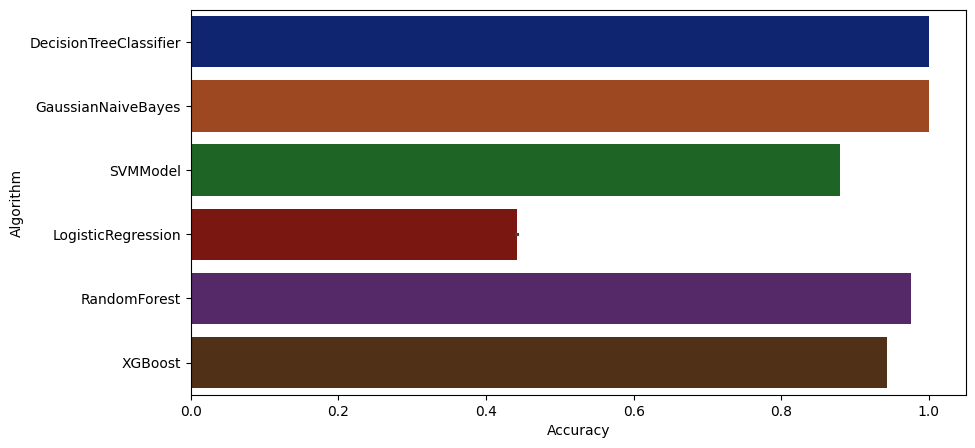

In [28]:
plt.figure(figsize=(10, 5))
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=modelname, palette='dark')
plt.show()

## Accuracy Comparison

In [29]:
accuracy_models = dict(zip(modelname, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

DecisionTreeClassifier --> 1.0
GaussianNaiveBayes --> 1.0
SVMModel --> 0.8795811518324608
LogisticRegression --> 0.4410994764397906
RandomForest --> 0.975130890052356
XGBoost --> 0.943717277486911


## Making a prediction

In [69]:
import pandas as pd
import pickle
import numpy as np

# Sample input data
input_data = {
    'crop_temp': 30.959,
    'crop_humidity': 400,
    'crop_ph': 8.104,
    'crop_nitrogen': 300.6,
    'crop_phosphorus': 15.1,
    'crop_potassium': 7.35,
    'crop_calcium': 3.5,
    'crop_magnesium': 1.25,
    'crop_zinc': 0.39,
    'crop_sodium': 0.643,
    'crop_ec': 1.8,
    'crop_light': 521.6
}

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Model file paths and accuracies
models_info = {
    "DecisionTree.pkl": 1.0,
    "GaussianNB.pkl": 1.0,
    "RandomForest.pkl": 0.975130890052356,
    "XGBoost.pkl": 0.943717277486911
}

# Directory containing the models
models_dir = "../models/"

# Load crop mapping data
crop_data = pd.read_csv("D:\codesAndCoke\SUMMER INTERNSHIP\Smart-Hydroponics-System-AI-ML-IOT_SIP\Phase 2 - Data preparation\processed-data\pro_crop_data_final.csv")
crop_mapping = dict(zip(crop_data['crop_id'], crop_data['crop_name']))

# Initialize an empty list to store the weighted probabilities
weighted_probs = None
total_accuracy = 0

# Load each model and make predictions
for model_file, accuracy in models_info.items():
    model_path = models_dir + model_file
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    # Get probabilities for each crop
    probs = model.predict_proba(input_df)[0]
    
    # Initialize weighted_probs if it's the first model
    if weighted_probs is None:
        weighted_probs = np.zeros_like(probs)
    
    # Add weighted probabilities to the total
    weighted_probs += probs * accuracy
    total_accuracy += accuracy

# Normalize the weighted probabilities
weighted_probs /= total_accuracy

# Get the class names (assuming the model has a 'classes_' attribute with actual crop IDs)
class_ids = model.classes_

# Get the indices of the top 5 crops
top_3_indices = np.argsort(weighted_probs)[-1:][::-1]

# Get the top 5 crops and their probabilities
top_3_crops = [(crop_mapping[class_ids[i]], weighted_probs[i]) for i in top_3_indices]

# Print the top 5 crops and their probabilities
for crop, prob in top_3_crops:
    print(f"{crop}")


beefsteaktomatoes
